In [3]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

/Users/garycastle/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df_og = pd.read_csv('Data/Clean_Real_Estate.csv')
df_og = pd.DataFrame(df_og).fillna(0)

In [6]:
df_og

,Unnamed: 0,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE,Average School Rating
0,0,11 Hazelbranch,Aliso Viejo,CA,92656,975000,3,2.50,1470.0,4950.0,1993.0,3.0,663.0,http://www.redfin.com/CA/Aliso-Viejo/11-Hazelb...,OC21181915,33.592613,-117.738368,8.333
1,1,11 Sanderling Ln,Aliso Viejo,CA,92656,850000,3,2.50,1393.0,3000.0,1989.0,3.0,610.0,http://www.redfin.com/CA/Laguna-Beach/11-Sande...,LG21181169,33.592240,-117.749226,9.0
2,2,5 Skygate,Aliso Viejo,CA,92656,1350000,4,3.00,2918.0,5040.0,1989.0,5.0,463.0,http://www.redfin.com/CA/Aliso-Viejo/5-Skygate...,OC21160272,33.594179,-117.740063,8.333
3,3,15 Starling Ln,Aliso Viejo,CA,92656,995000,3,2.50,1605.0,3480.0,1989.0,6.0,620.0,http://www.redfin.com/CA/Aliso-Viejo/15-Starli...,LG21176453,33.596696,-117.744324,9.0
4,4,78 Summerland Cir,Aliso Viejo,CA,92656,1549000,4,4.50,3258.0,5546.0,2011.0,10.0,475.0,http://www.redfin.com/CA/Aliso-Viejo/78-Summer...,CV21176676,33.595652,-117.723661,7.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1346,5191 Wendover Rd,Yorba Linda,CA,92886,1974000,7,5.25,3463.0,18270.0,1965.0,87.0,570.0,http://www.redfin.com/CA/Yorba-Linda/5191-Wend...,PW21107820,33.885782,-117.797048,8.333
1347,1347,5461 Mountain View Ave,Yorba Linda,CA,92886,1087000,4,3.00,1803.0,9600.0,1961.0,99.0,603.0,http://www.redfin.com/CA/Yorba-Linda/5461-Moun...,OC21104129,33.881948,-117.804192,8.667
1348,1348,18950 Suncrest Dr,Yorba Linda,CA,92886,3250000,5,5.50,5364.0,23681.0,2002.0,104.0,606.0,http://www.redfin.com/CA/Yorba-Linda/18950-Sun...,OC21099744,33.890639,-117.803505,9.333
1349,1349,4115 Live Oak Ln,Yorba Linda,CA,92886,4799999,6,7.50,9302.0,43560.0,1991.0,125.0,516.0,http://www.redfin.com/CA/Yorba-Linda/4115-Live...,OC21082623,33.901382,-117.771741,9.0


In [7]:
df = df_og.copy()

In [8]:
df.dtypes

Unnamed: 0                                                                                      int64
ADDRESS                                                                                        object
CITY                                                                                           object
STATE OR PROVINCE                                                                              object
ZIP OR POSTAL CODE                                                                              int64
PRICE                                                                                           int64
BEDS                                                                                            int64
BATHS                                                                                         float64
SQUARE FEET                                                                                   float64
LOT SIZE                                                                          

In [9]:
df['PRICE'] = np.log(df['PRICE'])

In [10]:
df_train, df_test = train_test_split(df, test_size=.20)

In [11]:
features = ['BATHS', 'BEDS', 'SQUARE FEET', 'LOT SIZE', 'PRICE']

In [12]:
df_train = df_train[features]
df_test = df_test[features]

In [13]:
X_train, y_train = df_train.drop('PRICE',axis=1), df_train['PRICE']
X_test, y_test = df_test.drop('PRICE',axis=1), df_test['PRICE']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

In [14]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
rf.score(X_test, y_test)

0.7296452689712027

In [20]:
rf.score(X_train, y_train)

0.9586373667641236

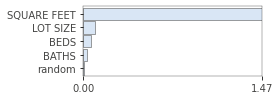

In [15]:
imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

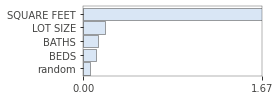

In [27]:
imp = importances(rf, X_train, y_train) # permutation
viz = plot_importances(imp)
viz.view()

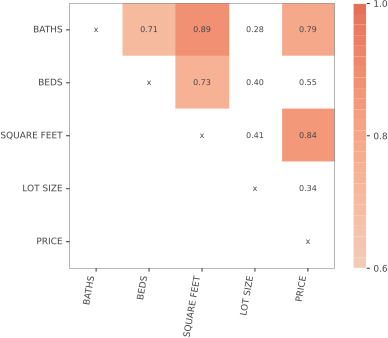

In [18]:
viz1 = plot_corr_heatmap(df_train, figsize=(7,5))
viz1

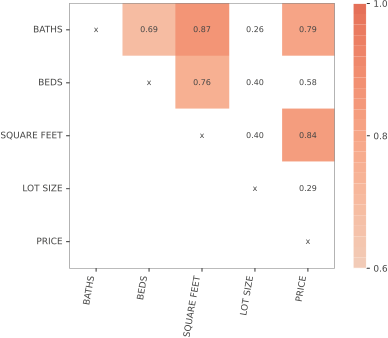

In [28]:
viz1 = plot_corr_heatmap(df_test, figsize=(7,5))
viz1

In [22]:
sorted(zip(rf.feature_importances_, features), reverse=True)

[(0.7379314537518356, 'SQUARE FEET'),
 (0.10504808983623344, 'LOT SIZE'),
 (0.06625638853888824, 'BATHS'),
 (0.058436167414388014, 'PRICE'),
 (0.032327900458654746, 'BEDS')]